# Prediction Heart Disease using Machine Learning

This project will demonstrate some foundation of `machine learning` and `data science` by  exploring the problem of heart disease classification.

For our journey to learn data science, we were trilled to learn different techniques. 
`Classification` involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.

We will approach the problem with the following machine learning modelling framework.
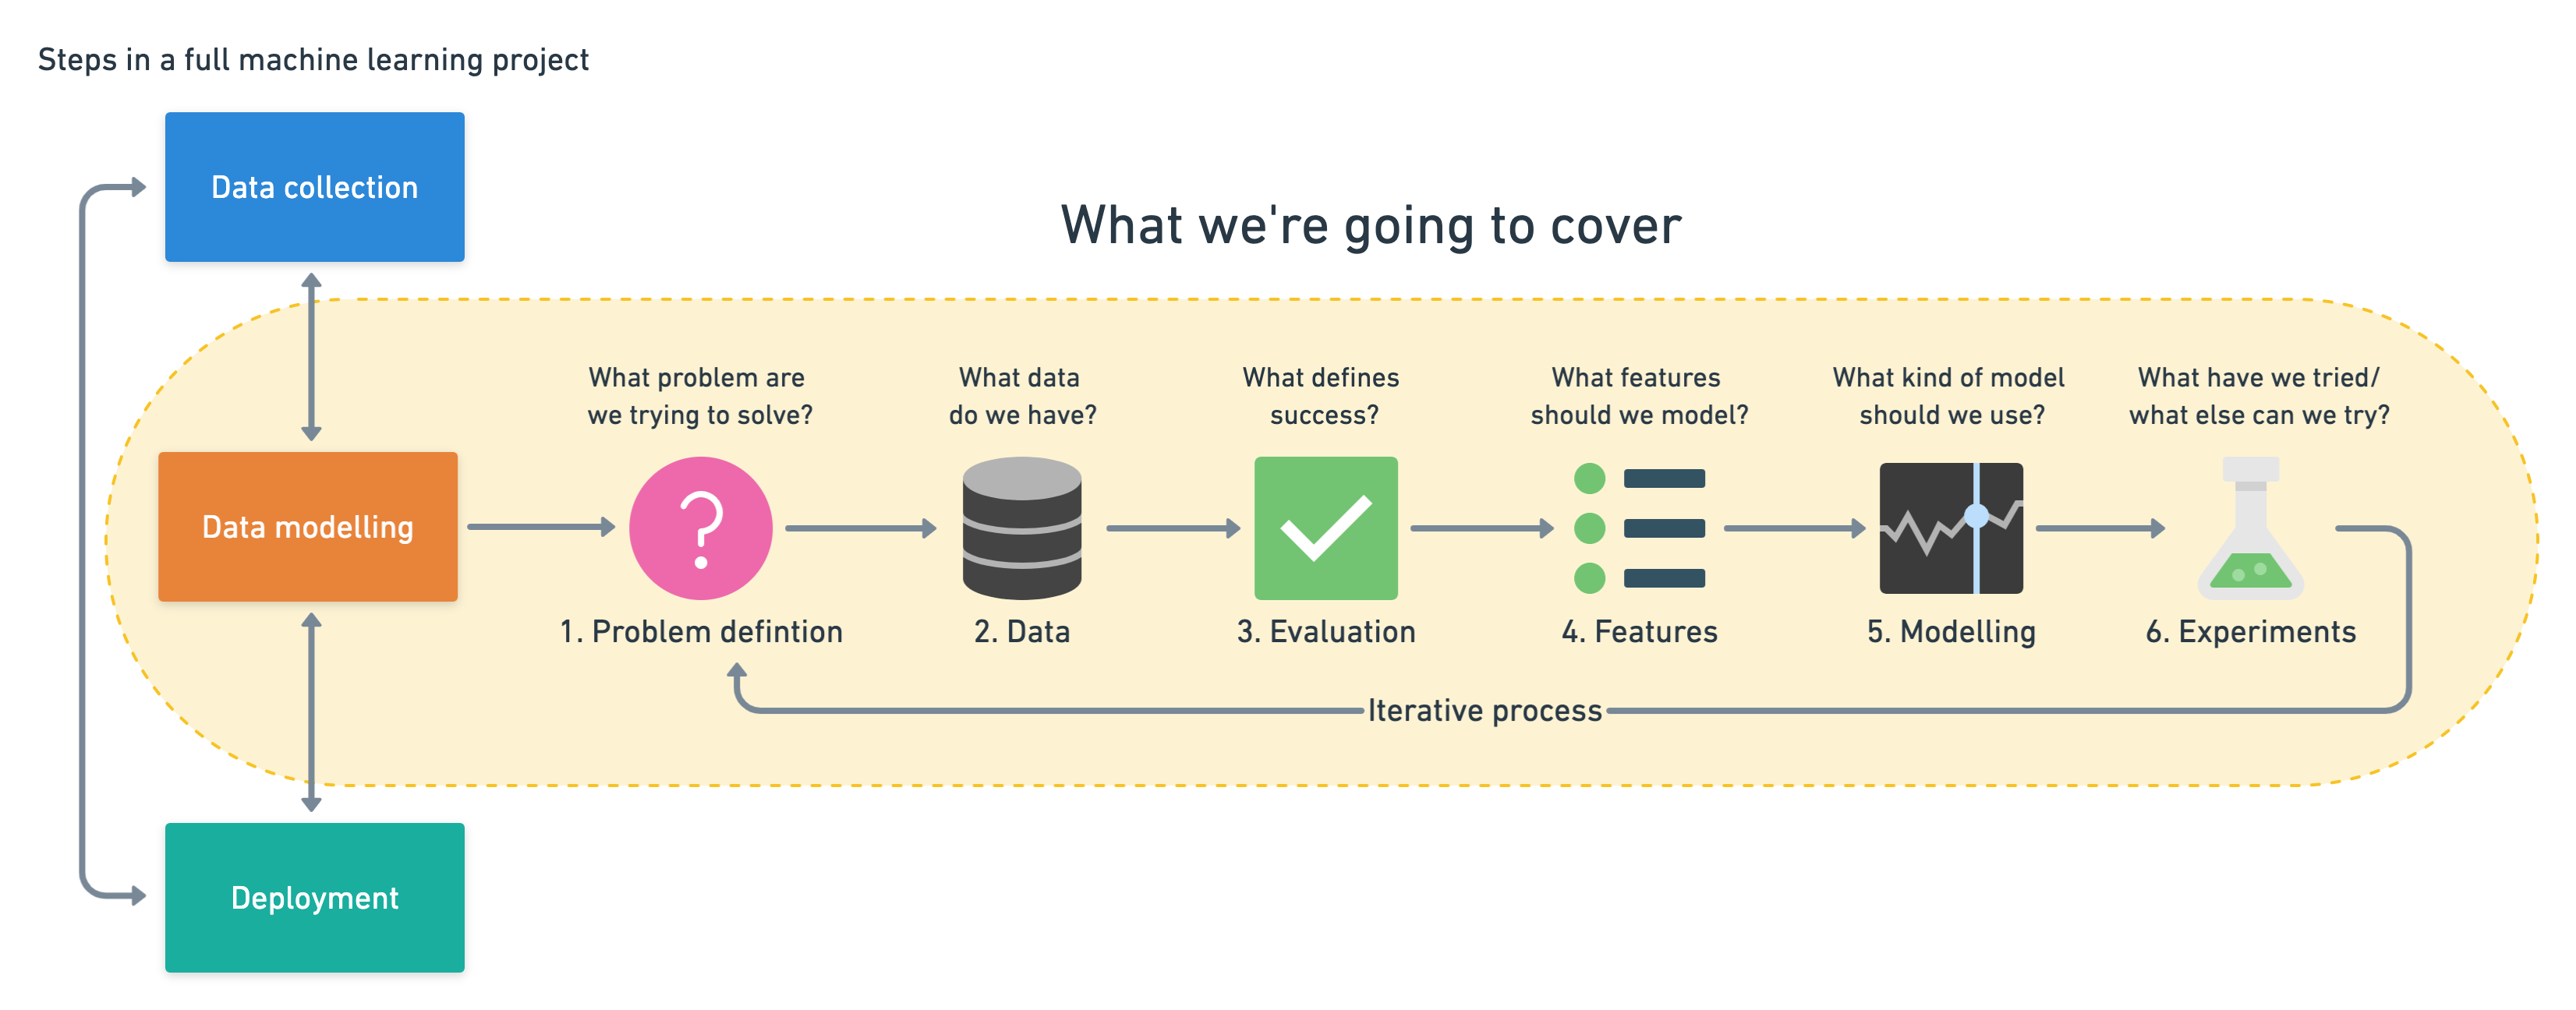

6 Step Machine Learning Modelling Framework
More specifically, we'll look at the following topics.

More specifically, we'll look at the following topics.

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.
1. `Model training` - create model(s) to learn to predict a target variable based on other variables.
2. `Model evaluation` - evaluating a models predictions using problem-specific evaluation metrics.
3. `Model comparison` - comparing several different models to find the best one.
4. `Model fine-tuning` - once we've found a good model, how can we improve it?
5. `Feature importance` - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
6. `Cross-validation` - if we do build a good model, can we be sure it will work on unseen data?
7 Reporting what we've found - if we had to present our work, what would we show someone?

# 1. Problem Definition

We will be exploring `binary classification` which means a sample can only be one of two things. We are going use numbers of feautures about a person to predict whether they have heart disease or not.

Given  clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data

The data is from Cleveland Database from UCI Machine Learning Repository
The original database contains 76 attributes , here only 14 will be used for our project.
 Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

# 3. Evaluation

We want to reach 95% for accuracy at predicting whether or not a patient has heart disease during the proof of concept. if it is successful, we'll pursure this project.

# 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
        chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
5. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
6. restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
7. thalach - maximum heart rate achieved
8. exang - exercise induced angina (1 = yes; 0 = no)
9. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
10. unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
13. thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
 
Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools 

we will use pandas Numpy Matplotlib and Scikit_Learn:
    * pandas for data analysis.
    * NumPy for numerical operations.
    * Matplotlib/seaborn for plotting or data visualization.
    * Scikit-Learn for machine learning modelling and evaluation.

In [4]:
# Regular EDA and  plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # panda will be use for data analysis
import matplotlib.pyplot as plt # for plotting and making graph
import seaborn as sns

# Plot will be appear in the notebook
%matplotlib inline 

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluators 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



# Load Data

In [98]:
df = pd.read_csv("heart-disease.csv")
df.shape # number of rows 

(303, 14)

# Data Exploration 
We are going to use basic EDA techniques to get some useful information about the data. These information should tell us what we should deal with the data and what outliers we have


In [8]:
# let's chek the top 10 rows 
df.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1  
6   0     2       1  
7   0     3       1  
8   0     3       1  
9   0     2       1

In [10]:
# let's count the target column
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered `balanced`. 
Now, we are going normalized the target


In [11]:
# Normalize value counts 
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

We can plot the target counts to see the normalized values in bar plot 


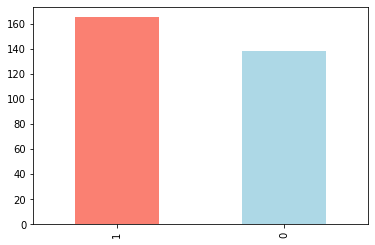

In [12]:
# Plot the value counts with a bar graph 
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"]);

Let see some critical information about our data such as : 
    1. missing values
    2. data types
    3. data class
    
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

# Heart Disease Frequency based on Gender 
We are going to compare our target column with sex. 1 means patient with heart disease and 0 means no heart disease


In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

We have 207 males and 96 women in our study


In [17]:
# compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex      0    1
target         
0       24  114
1       72   93

Based on the small table, we can say about our data that approximately 100 women and 72 of them have a positive value for heart diseas.
we migh infer there is a 75% chance that one of them might have heart disease. 

As for male , there's about 200 and more than half indicating a precense of heart disease.  if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple baseline, we'll try to beat it with machine learning.

# Visual Crosstab 

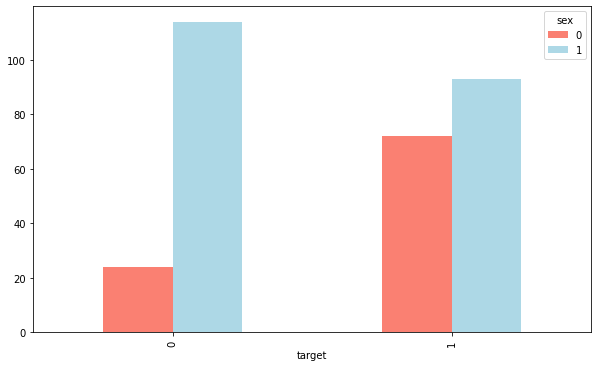

In [24]:
# Creating a crosstab plot 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);

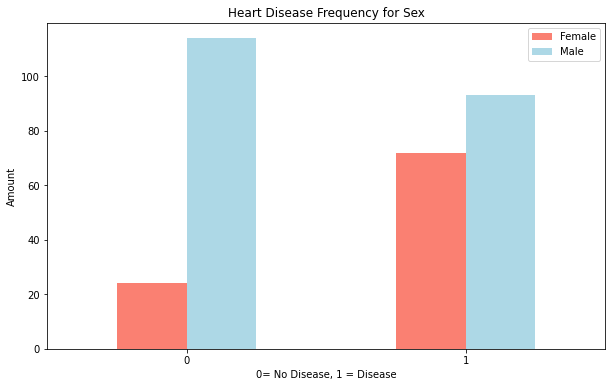

In [26]:
# Lets add some attribute to the graph 
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
# Add some attribute to the graph 
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0); # Keep the label and x-axis vertical 

# Age vs Max Heart Rate for Heart Disease
We will trry to combine some independent variables then copare them to our target column. 

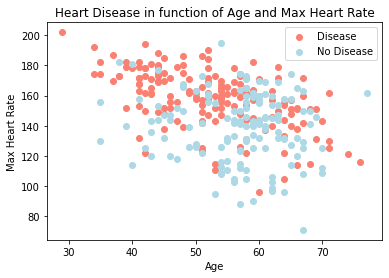

In [28]:
# create another figure 

# start with positive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon") # define it as a scatter plot

# now for negative example , we want them on the same plot we call plt again 
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue") # axis always come (x,y)

# Add some helpful information 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])

plt.ylabel("Max Heart Rate");

What we can infer from this graph: 
    1. Younger people seems to have max heart rate 
    2. Dots are higgher in right side of the graph
    3. Older people seems to be lower max rate (50 - 68)
    4. only on person younger than 30 years of age is associate with heart disease

    
Now let check the age distribution 

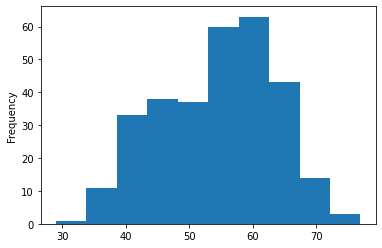

In [29]:
# histogram are great way to show distribution of a varaible 
df.age.plot.hist();

We can see it's a normal distribution but slightly swaying to the right, which reflects in the scatter plot above.

Let's keep going.

# Heart Disease Frequency per Chest Pain Type 
Chest Pain Type colunm `cp` has four unique values: 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [30]:
pd.crosstab(df.cp,df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

We are going to do the same thing we do for sex column 


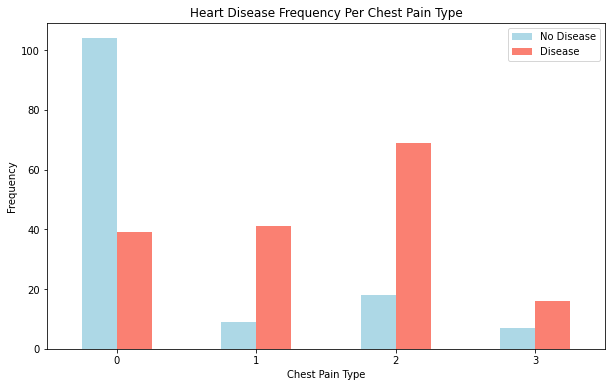

In [31]:
# create a new cross tab and base plot 
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["lightblue","salmon"])

# add attributes to the plot toi make it more readable 
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0);


What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

1. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
            
            
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a subject matter expert (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems even some medical professionals are confused by the term.

                    `Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.`
                    
                    
Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.


                    


# Correlation between independent variables 

we will compare our independent variables on the target column and why? 

Which independent variables will have a greater impact on our target

In [32]:
# Find the correlation between our independent variables 
corr_matrix = df.corr()
corr_matrix

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

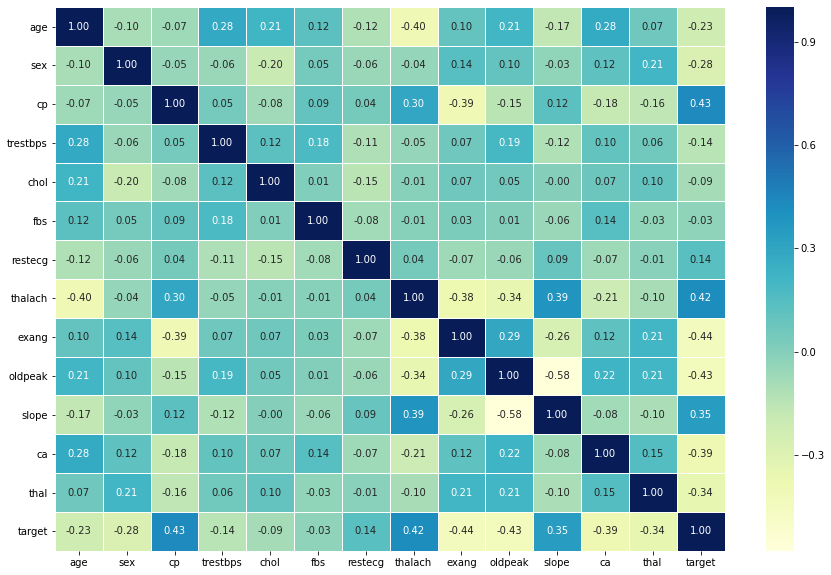

In [33]:
# let's graph the correlation 
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt= ".2f",
           cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

# Modeling

We will use machine learning to predict our target variables based on the 13 independent variables. 

Remember the problem? 

        * Given clinical parameters about a patient, can we predict whether or not they have heart disease?

    
    If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In [36]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [37]:
# Let make X and y from the data set
# Choose X and y 

X = df.drop("target", axis=1)

# target variable 
y = df.target.values

In [39]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [40]:
# Look at y 
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# training and test plit 
We will devide the data into training and test sets. We are going to train our model and test it to know how they behave with our target data

# Why not use all the data to train a model?
Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split() and feed it our independent and dependent variables (X & y).

In [42]:
# Random seed for reproductivity 
np.random.seed(42)

# Split into train and test set 
X_train, X_test,y_train,y_test = train_test_split(X,# independent variables 
                                                  y, # dependent variables
                                                  test_size = 0.2) # percentage of data used for test sets


We use 80% of the data to train and 20% to test on. 
For our problem we can also use validation (train/validation/test) set or cross-validation 

In [45]:
X_train.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3

In [47]:
y_train,len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1],
       dtype=int64), 242)

We using 242 sample to train our data 

In [49]:
X_test.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   

     slope  ca  thal  
179      1   1     1  
228      1   0     3  
111      2   1     3  
246      1   2     3  
60       2   1     2

In [50]:
y_test,len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64), 61)

And we got 61 examples we'will test our models on. Lets build on

# Model Choices
Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

    1. Logistic Regression - LogisticRegression()
    2. K-Nearest Neighbors - KNeighboursClassifier()
    3. RandomForest - RandomForestClassifier()
    
    #Why these? 
    
If we look at the Scikit-Learn algorithm cheat sheet, we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).
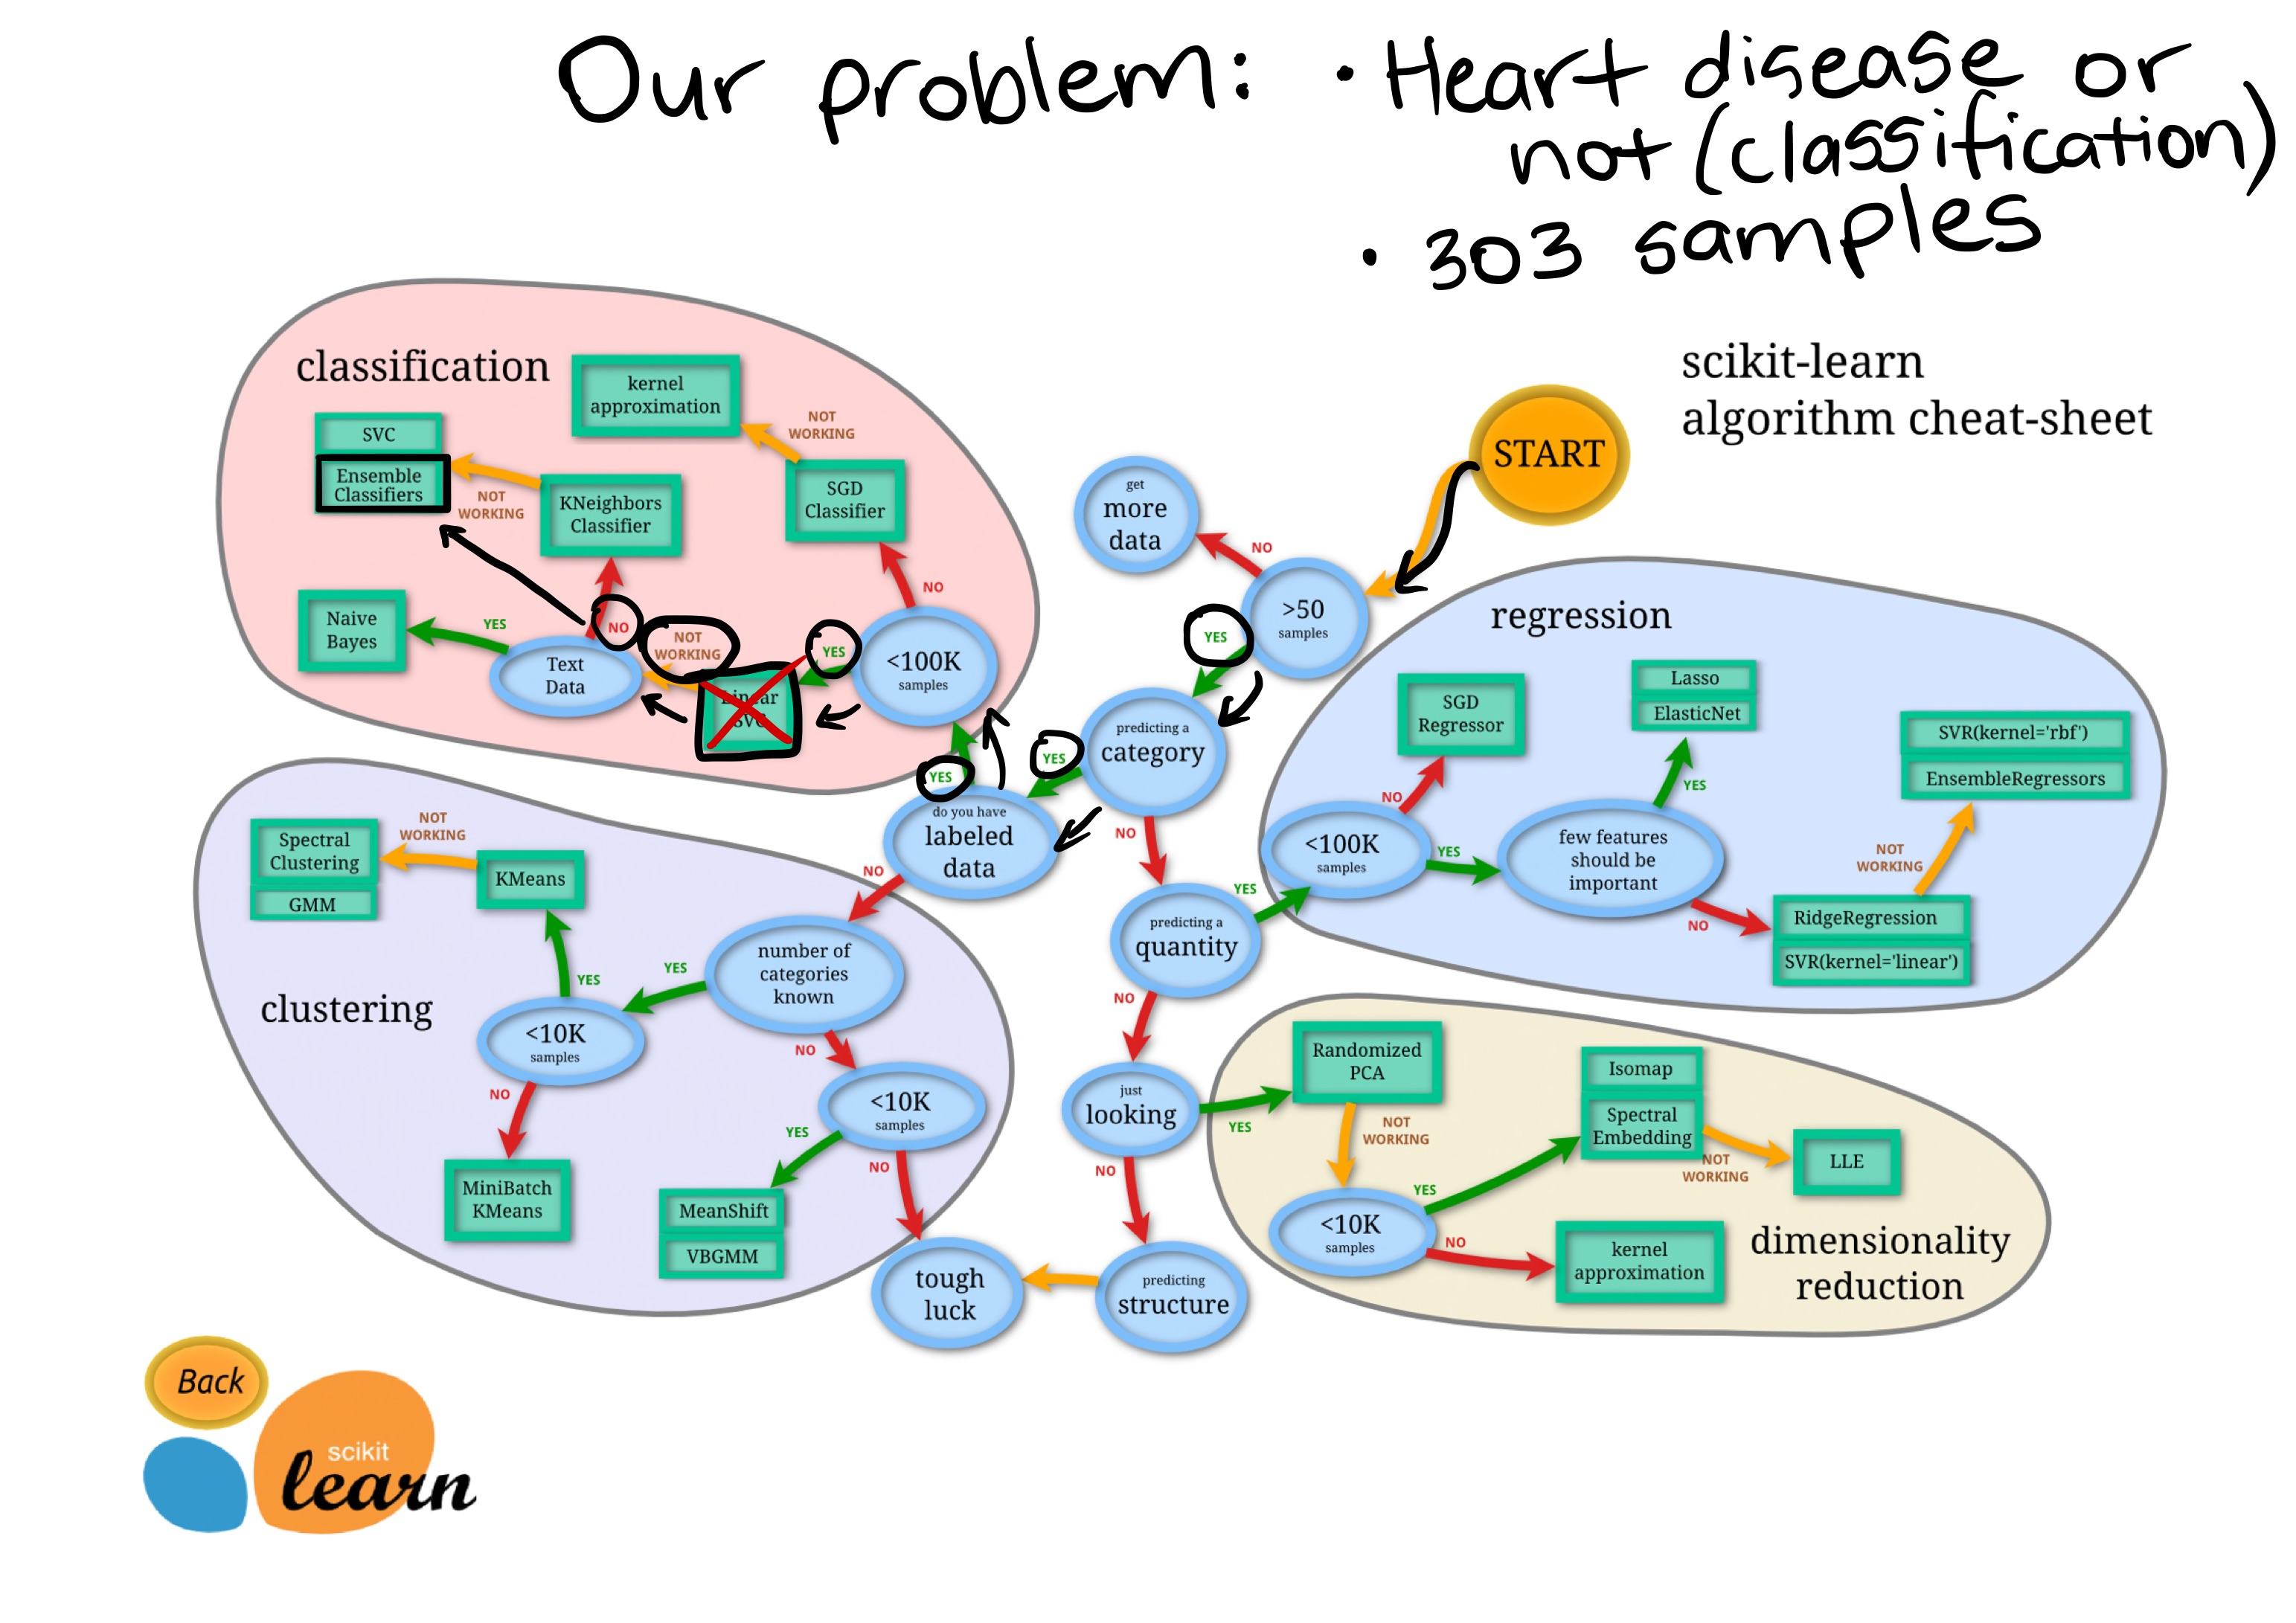


All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [55]:
# put the model in a dictionary 
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier()}
# Creat a function to fit and score models 
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fit and evaluates given machine learning models
    models: a dict of different Scikit_Learn machine learning models
    X_train: training data 
    X_test: testing data
    y_train: label associated with training data
    y_test: label associated with test data
    
     
    """
    # Random Seed for reproductive results 
    np.random.seed(42)
    
    # Make a list to keep model scores
    model_scores = {}
    # loop through models 
    for names,model in models.items():
        #Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores 
        model_scores[names] = model.score(X_test,y_test)
        
    return model_scores

In [56]:
model_scores = fit_and_score(models=models, 
                            X_train=X_train,
                            X_test = X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Warner_xxxboa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

# Model Comparaison 

Since our model is fitting, lets compare them  visually 


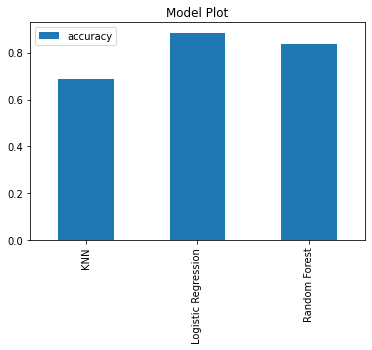

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.title("Model Plot");


Now We find the model that works for our project. The LogisticRegression() model perform best
> Let take it to the boss and show her what we've found.
        You: I've found it!

        Her: Nice one! What did you find?

        You: The best algorithm for prediting heart disease is a LogisticRegrssion!

        Her: Excellent. I'm surprised the hyperparameter tuning is finished by now.

        You: wonders what hyperparameter tuning is

        You: Ummm yeah, me too, it went pretty quick.

        Her: I'm very proud, how ab`mout you put together a classification report to show the team, and be sure to include a confusion matrix, and the cross-validated precision, recall and F1 scores. I'd also be curious to see what features are most important. Oh and don't forget to include a ROC curve.

        You: asks self, "what are those???"

        You: Of course! I'll have to you by tomorrow.

We are going through all the subject that are listed below: 
                   * Hyperparameter tuning - Each model you use has a series of dials 
                     you can turn to dictate how they perform. Changing these values may increase
                     or decrease model performance.
                
                   * Feature importance - If there are a large amount of features we're
                     using to make predictions, do some have more importance than others?
                     For example, for predicting heart disease, which is more important, 
                     sex or age?
                 
                   * Confusion matrix - Compares the predicted values with the true values 
                     in a tabular way, if 100% correct, all values in the matrix will 
                     be top left to bottom right (diagnol line).

                   * Cross-validation - Splits your dataset into multiple parts and train and
                     tests your model on each part and evaluates performance as an average.
                   
                   * Precision - Proportion of true positives over total number of samples. 
                     Higher precision leads to less false positives.
                     
                     
                   * Recall - Proportion of true positives over total number of true positive
                     and false negatives. Higher recall leads to less false negatives.
                   * F1 score - Combines precision and recall into one metric. 1 is best,
                     0 is worst.
                   * Classification report - Sklearn has a built-in function called 
                     classification_report() which returns some of the main classification
                     metrics such as precision, recall and f1-score.
                     
                   * ROC Curve - Receiver Operating Characterisitc is a plot of true positive
                     rate versus false positive rate.
                     
                   * Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model
                    achieves a score of 1.0.

# Hyperparameter tuning and cross-validation 
We will use validation set since we dont have a lot of data cross-validation as well 

* the most common type of cross-validation is k-fold. It involves splitting your data into k-folds and then test it on a model on each. 
For example , lets say we had 5 folds(k=5). this is what it might look: 
    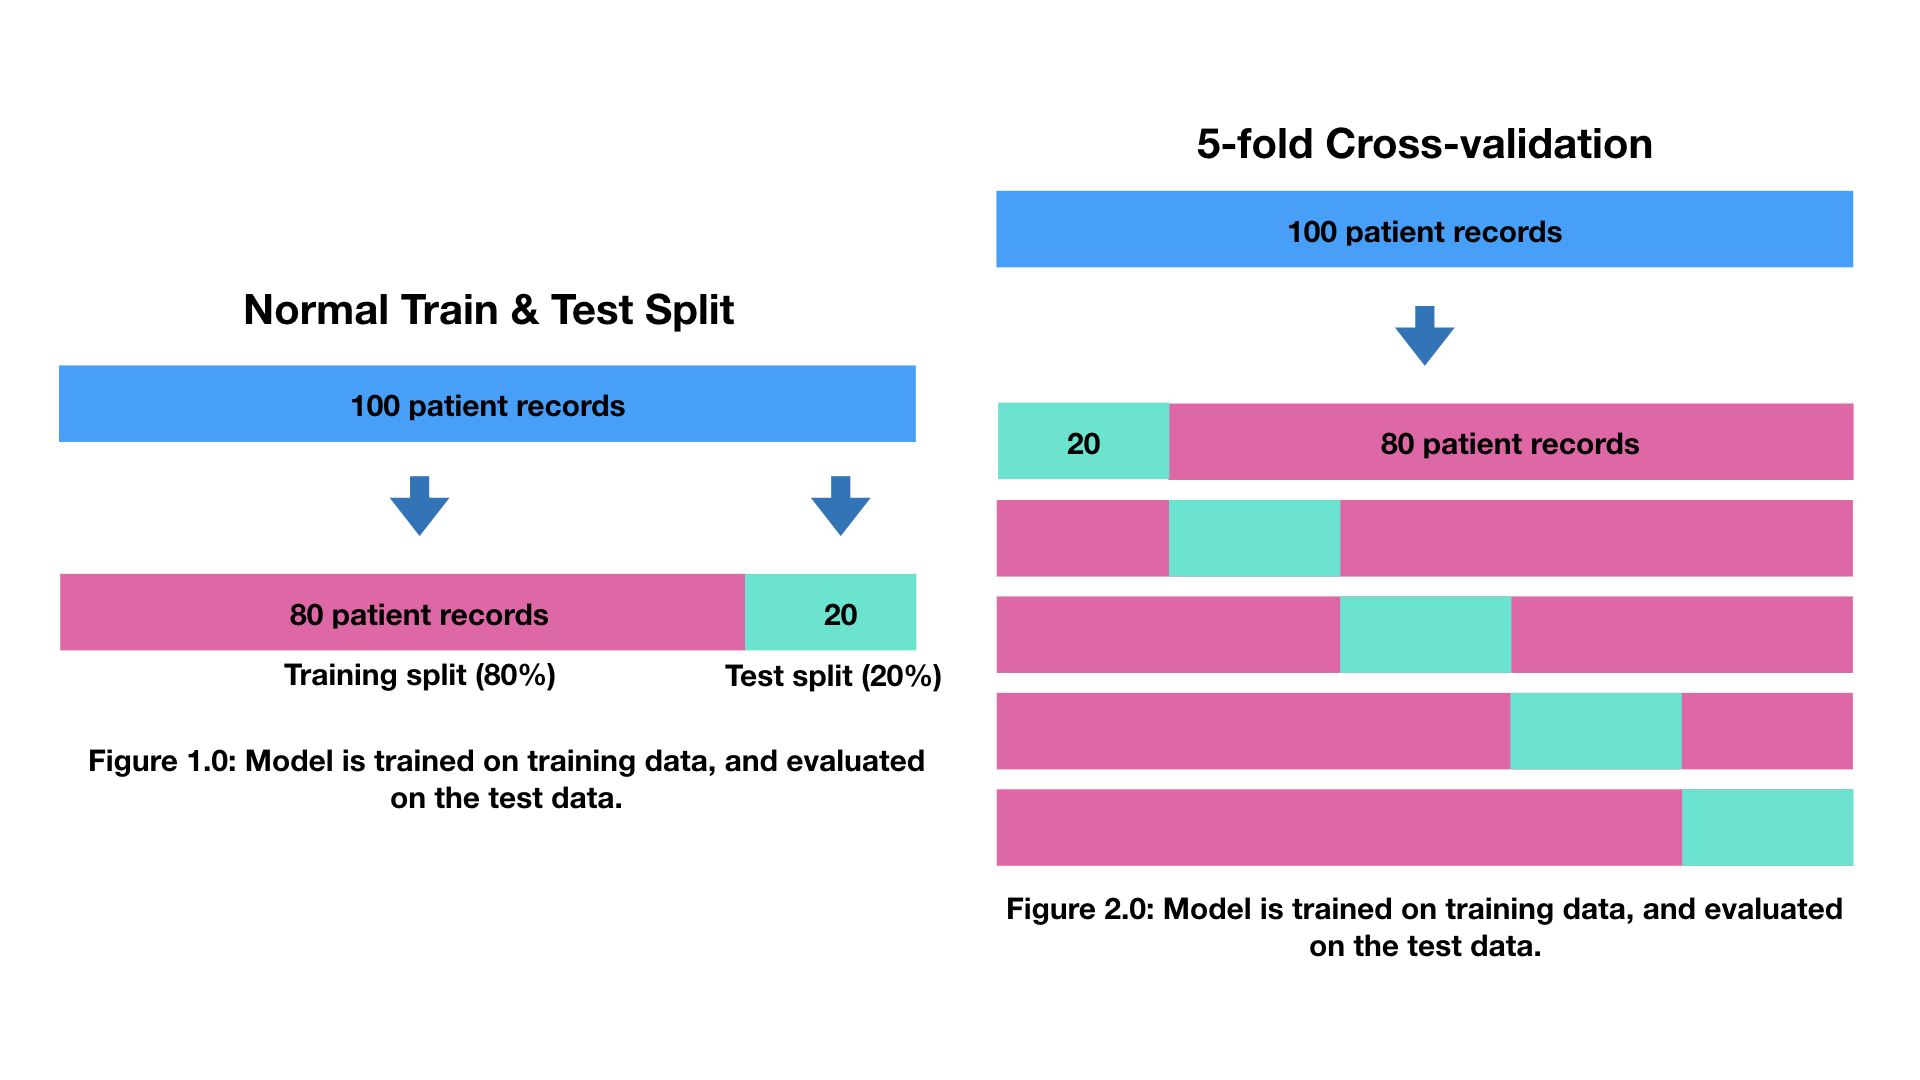
    
    

* Normal train and test split versus 5-fold cross-validation

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precision, recall, F1-score and ROC at the same time.

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

# Tune KNeighborsClassifiers by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (n_neigbors=5).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If n_neighbors=5 then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of n_neighbors.

In [99]:
# create a list of train score 
train_scores = []

# create a list of test score 
test_scores = []

# creating a different sets of neighbors value for n_neighbors 
neighbors = range(1,21) # 1 to 21 

# Set up an algorith
knn = KNeighborsClassifier()

# loop through different neighbors values
for i in neighbors: 
    knn.set_params(n_neighbors = i) # set neighbors
    
    # fit the algorithm
    knn.fit(X_train,y_train)
    
    # update the training scores 
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scores 
    test_scores.append(knn.score(X_test,y_test))

>  let's look at KNN's training scores 

In [100]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

> Let's try to understand . we have to plot the result



Maximum KNN score on the test data: 75.41%


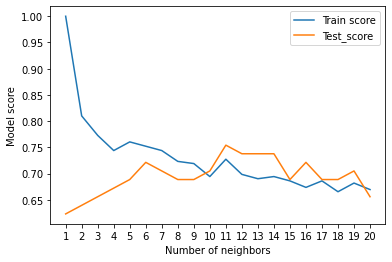

In [101]:
plt.plot(neighbors,train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

In [77]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Looking at the graph, n_neighbors = 11 seems best.

Even knowing this, the KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

# Tuning models with RandomizedSearchCV
Let's do the same with RandomizedSeachCV 

In [106]:
# Differenty Logistic Regression parameters 
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters 
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}



Now let's use randomizedSearchCV to try and tune our LogisticRegression model. 
We will pass it through different hyperparameters fropm log_reg_grid as well as n_iter = 20. 
> This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [102]:
# set up random seed
np.random.seed(42)

# Set up random hyperparameters search for Logistic regression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# fit random hyperparameter search model 
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [103]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [104]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we have tuned LogisticRegression using RandomizedSearchCV. 
> We will use RamdomForestClassifier. 


In [107]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [108]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [109]:
# evaluate the randomized search model forest 
rs_rf.score(X_test,y_test)

0.8688524590163934

That is excellent ! We tuned the hyperparameters to boost our model performances in both `RandomForestClassifier' and `LogisticRegression`.

But since LogisticRegression is pulling out in front, we'll try tuning it further with GridSearchCV.

# Tunbing a model with GridSearchCV

The difference between RandomizedSearchCva and GridSearchCV where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

> RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
> GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [110]:
# Different Logistic Regression hyperparameters 
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Set up grid for hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [111]:
# Checks the best parameters 
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [112]:
# Evaluate the model 
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a maximum of 20 different hyperparameter combinations.

Note: If there are a large amount of hyperparameters combinations in your grid, GridSearchCV may take a long time to try them all out. This is why it's a good idea to start with RandomizedSearchCV, try a certain amount of combinations and then use GridSearchCV to refine them.

# Evaluating a classification model , beyond accuracy 
Our model has been tuned. So Now we are going to use some metrics to evaluyate the model

We will calculate :

   > `ROC curve and AUC score` - plot_roc_curve()
   
   > `Confusion matrix` - confusion_matrix()
   
   > `Classification report` - classsification_report()
   
   > `Precision` - precision_score()    
   
   > `F1-score`  - f1_score()
    
    
To access these built-in functions, we'll have to use our model to make predictions on the test set. You can make predictions by calling predict() on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.


In [114]:
# Make predictions on test data 
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

They look like our original test data labels, except different where the model has predicted wrong

In [116]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Since we have the prediction values, we can find the metrics we want

`ROC curve and AUC score` - plot_roc_curve()

# Roc and AUC Curve Scores 
It is a way of understanding how our model is performing by comparing the true positive rate to the false positive rtate 


In our case ...

    > To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Reading the documentation on the `plot_roc_curve` function we can see it takes (estimator, X, y) as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.

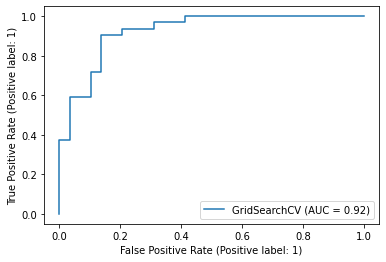

In [118]:
# import Roc curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot the Roc curve and calculate auc metric 
plot_roc_curve(gs_log_reg,X_test,y_test);

This is great. Our model has AUC = 0.92. But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

Let's move onto the next evaluation request, a confusion matrix.

# Confusion Matrix 

A confusion matrix is a visual way to see how our model made the right predictions and where it made the wrong ones.

> Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [119]:
# display confusion matrix 
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


Let represent confusion matrix in a better way using seaborn package 

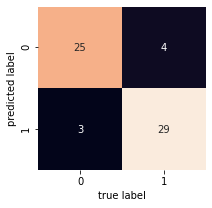

In [121]:
# Import seaborn 
import seaborn as sns


def plot_conf_mat(y_test,y_preds):
    
    """
    PLot a confusion matrix using seaborn's heatmap().
    
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)


Beautiful! That looks much better.

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

# Classification report
We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [123]:
# Show Classification report 
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Let's get a refresh.

> Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

> Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

> F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

> Support - The number of samples each metric was calculated on.

> Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

> Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

> Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

These scores were calculated using ssingle training and test set

We will make them more solid using cross-validation 


We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined scoring parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [125]:
# Check the best hyperparameters 
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [127]:
# Import cross_val_score 
from sklearn.model_selection import cross_val_score 

# instantiate best model with best hyperparameters ( found with GridSearchCV )
clf = LogisticRegression(C = 0.23357214690901212,
                        solver= 'liblinear')

We have got an instatiated classifier , let's find some cross-validation metrics 


In [128]:
# Cross validation accuracy score 
cv_acc = cross_val_score( clf,
                        X,
                        y,
                        cv=5, # 5 fold cross-validation
                        scoring ="accuracy") # accuarcy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there are 5 metrics , we will take the average 


In [129]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

# let's do the same for other classification reports

In [131]:
# Cross - validation for precision score 
cv_precision = np.mean(cross_val_score(clf,
                                      X,
                                      y,
                                      cv=5,
                                      scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [133]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                   X,
                                   y,
                                   cv=5,
                                   scoring='recall')) # recall as scoring
cv_recall

0.9272727272727274

In [134]:
# Cross-validated F1 score 
cv_f1 = np.mean(cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="f1"))
cv_f1

0.8705403543192143

Okay, We've got cross validated metrics, now what?

Let's visualize them

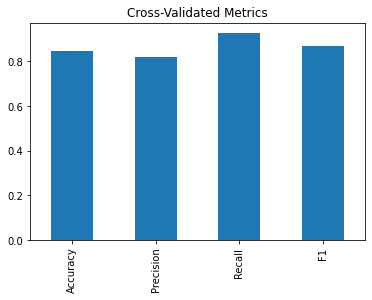

In [135]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

The metrics look nice! the final thing to off the list of our model evaluation techniques is feature importance.

# Feature Importance 

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?



Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.



You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".



Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_ attribute after we've fit an instance of LogisticRegression.

In [136]:
# fit an instance of LogisticRegression (taken fom above )

clf.fit(X_train,y_train);

In [137]:
# Check coef
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [140]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

Now we've match the feature coefficient to different feautures, lets visualize them 


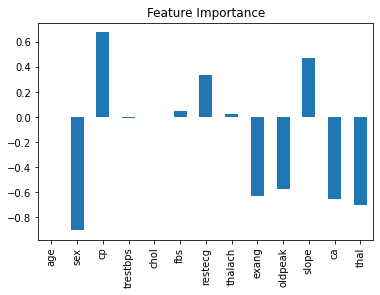

In [143]:
# visualize feauture importance 
features_df = pd.DataFrame(features_dict, index =[0])
features_df.T.plot.bar(title="Feature Importance",legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [144]:
pd.crosstab(df.sex,df.target)

target    0   1
sex            
0        24  72
1       114  93

You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [145]:
# contrast slope (positive coefficient) with target
pd.crosstab(df.slope,df.target)

target   0    1
slope          
0       12    9
1       91   49
2       35  107

Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

>0: Upsloping: better heart rate with excercise (uncommon)

>1: Flatsloping: minimal change (typical healthy heart)

>2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can you do with this information?

This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

# Experimentation

Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.